### Fake News Detecton

Fake news causes many problems in society and the consequences are catastrophic. We can look at twitter as an example who are trying very hard to track and label fake news. We will use machine learning algorithms to perform classification or prediction of news being true otr false. We will use NLP(Natural Language Processing which is a branch of AI that deals with interaction between humans and computers using natural language

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

#### Overview of Dataset

Created by University of Tenessee, USA and is a collection of 20800 news articles

A training dataset has the following attributes:

- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable<br>
  1: unreliable<br>
  0: reliable

In [2]:
#Reading the train and test data
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [3]:
print("Shape of Training data: ", df_train.shape)
print("Shape of Testing data: ", df_test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [4]:
class_labels  = df_train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


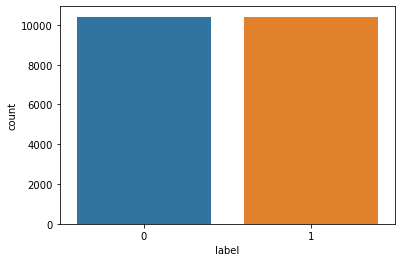

In [5]:
import seaborn as sns
ax = sns.countplot(x="label",data=df_train)

Data set is quite balanced 

In [6]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [7]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

We can drop "title", 'author'

In [8]:
df = df_train.drop(["id", "title", "author"], axis = 1)

In [9]:
# how many null values in the dataset
print("Null values in train data:")
print(df_train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(df_test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


<AxesSubplot:>

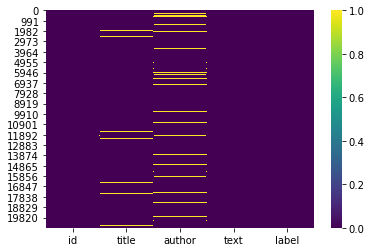

In [10]:
sns.heatmap(df_train.isnull(), cmap='viridis')

In [11]:
# Dropping null values
df_d= df.dropna()

In [12]:
df_d.isnull().sum()

text     0
label    0
dtype: int64

<AxesSubplot:>

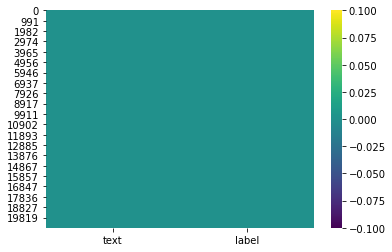

In [13]:
sns.heatmap(df_d.isnull(), cmap='viridis')

In [14]:
df=df_d

In [15]:
df = df.sample(frac = 1) ## randomly shuffling

In [16]:
df.head(10)

,text,label
20023,"One of two things just happened, folks. \nEith...",1
15465,Taliban jihadists generated $15 million for te...,0
8190,ISTANBUL — One man worked as a Turkish tran...,0
4369,"ATLANTA — When Michael Fitzgerald, a local ...",0
14220,"Your workday goes into extra time, and you los...",1
13692,by Yves Smith \nEven though this assessment of...,1
12160,Japan’s Population Declines in 2015 for First ...,1
15131,"Behind the headlines - conspiracies, cover-ups...",1
15009,It’s a good time to check the rate on your hom...,0
1561,Montgomery Markland wants to adapt one of the ...,0


In [17]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [18]:
df.columns

Index(['text', 'label'], dtype='object')

In [19]:
df.head()

,text,label
0,"One of two things just happened, folks. \nEith...",1
1,Taliban jihadists generated $15 million for te...,0
2,ISTANBUL — One man worked as a Turkish tran...,0
3,"ATLANTA — When Michael Fitzgerald, a local ...",0
4,"Your workday goes into extra time, and you los...",1


In [20]:
x = df["text"]
y = df["label"]
x.shape, y.shape

((20761,), (20761,))

In [21]:
x

0        One of two things just happened, folks. \nEith...
1        Taliban jihadists generated $15 million for te...
2        ISTANBUL  —   One man worked as a Turkish tran...
3        ATLANTA  —   When Michael Fitzgerald, a local ...
4        Your workday goes into extra time, and you los...
                               ...                        
20756    Putin Prepares For World War 3 With Simulated ...
20757    MQ-1 Predator unmanned aircraft (Lt Col Leslie...
20758    As a ferocious,   blizzard pummeled our window...
20759    Kevin Shenkman could be described as one of th...
20760    New Yorkers fight to overturn ballot selfie ba...
Name: text, Length: 20761, dtype: object

In [22]:
y

0        1
1        0
2        0
3        0
4        1
        ..
20756    1
20757    1
20758    0
20759    0
20760    1
Name: label, Length: 20761, dtype: int64

In [23]:
#Splitting training data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [26]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Passive Agressive Classifier

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=10000, random_state=1,tol=1e-3).fit(xv_train, y_train)

In [28]:
y_pred_pa = model.predict(xv_test)
print(model.score(xv_test, y_test))

0.966673088036987


In [29]:
print(classification_report(y_test,y_pred_pa))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2613
           1       0.97      0.97      0.97      2578

    accuracy                           0.97      5191
   macro avg       0.97      0.97      0.97      5191
weighted avg       0.97      0.97      0.97      5191



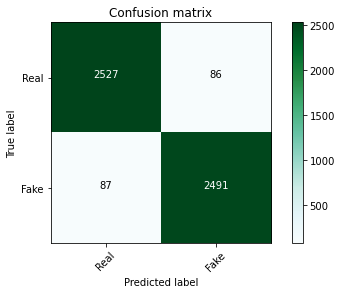

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred_pa)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## Multi-Layer Perceptron

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(xv_train, y_train)

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [33]:
clf.predict_proba(xv_test[:1])

array([[0.99757851, 0.00242149]])

In [34]:
pred_ann= clf.predict(xv_test)
clf.score(xv_test, y_test)

0.9633981891735697

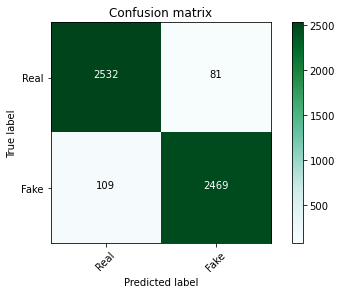

In [35]:
cm = metrics.confusion_matrix(y_test, pred_ann)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [36]:
print(classification_report(y_test,pred_ann))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2613
           1       0.97      0.96      0.96      2578

    accuracy                           0.96      5191
   macro avg       0.96      0.96      0.96      5191
weighted avg       0.96      0.96      0.96      5191



## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
pred_lr=LR.predict(xv_test)

In [41]:
LR.score(xv_test, y_test)

0.9450972837603545

In [42]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2613
           1       0.94      0.95      0.94      2578

    accuracy                           0.95      5191
   macro avg       0.95      0.95      0.95      5191
weighted avg       0.95      0.95      0.95      5191



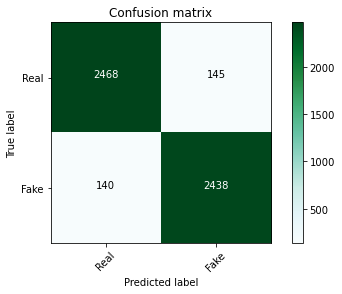

In [43]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)
pred = NB.predict(xv_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(xv_test, y_test)))

Accuracy of NB classifier on test set: 0.83


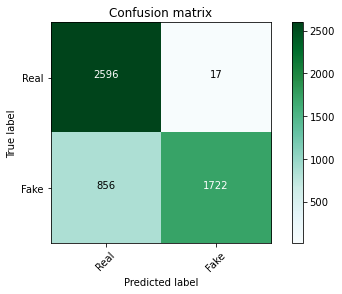

In [46]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86      2613
           1       0.99      0.67      0.80      2578

    accuracy                           0.83      5191
   macro avg       0.87      0.83      0.83      5191
weighted avg       0.87      0.83      0.83      5191



## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [52]:
pred_dt = DT.predict(xv_test)

In [53]:
DT.score(xv_test, y_test)

0.8857638219996147

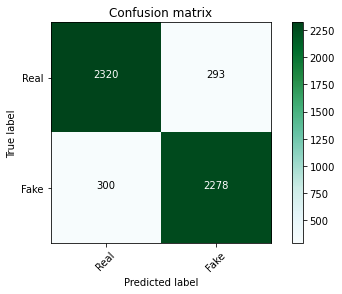

In [54]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [55]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2613
           1       0.89      0.88      0.88      2578

    accuracy                           0.89      5191
   macro avg       0.89      0.89      0.89      5191
weighted avg       0.89      0.89      0.89      5191



## GradientBoostingClassifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2613
           1       0.93      0.94      0.94      2578

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



In [58]:
print(GBC.score(xv_test, y_test))

0.9373916393758428


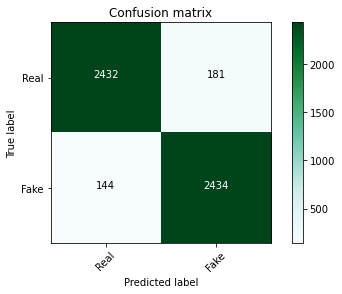

In [59]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=50, criterion="entropy")
RFC.fit(xv_train, y_train)
pred_RFC = RFC.predict(xv_test)
print(RFC.score(xv_test, y_test))
print(classification_report(y_test, pred_RFC))

0.9071469851666346
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2613
           1       0.92      0.89      0.91      2578

    accuracy                           0.91      5191
   macro avg       0.91      0.91      0.91      5191
weighted avg       0.91      0.91      0.91      5191



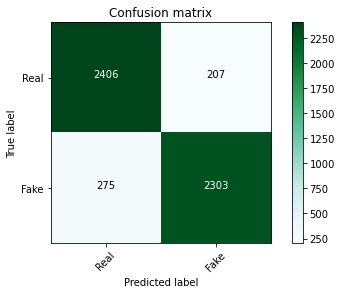

In [62]:
cm = metrics.confusion_matrix(y_test, pred_RFC)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6623001348487767
              precision    recall  f1-score   support

           0       0.94      0.35      0.51      2613
           1       0.60      0.98      0.74      2578

    accuracy                           0.66      5191
   macro avg       0.77      0.66      0.63      5191
weighted avg       0.77      0.66      0.63      5191



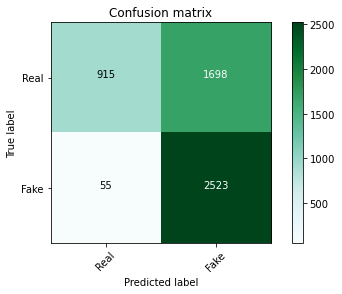

In [65]:
#k=3
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [67]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.711038335580813
              precision    recall  f1-score   support

           0       0.90      0.48      0.63      2613
           1       0.64      0.94      0.76      2578

    accuracy                           0.71      5191
   macro avg       0.77      0.71      0.70      5191
weighted avg       0.77      0.71      0.70      5191



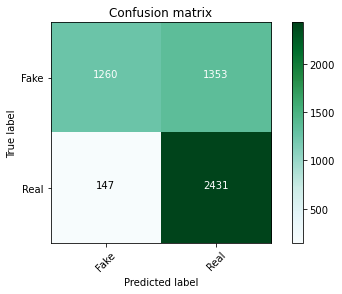

In [68]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [69]:
plt.savefig('KNN.jpg')

<Figure size 432x288 with 0 Axes>

## SVM -Linear Kernel

In [70]:
from sklearn import svm, metrics

svm_ = svm.SVC(kernel="linear")
svm_.fit(xv_train, y_train)
pred_svm = svm_.predict(xv_test)
print(svm_.score(xv_test, y_test))
print(classification_report(y_test, pred_svm))

0.9647466769408591
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2613
           1       0.96      0.97      0.96      2578

    accuracy                           0.96      5191
   macro avg       0.96      0.96      0.96      5191
weighted avg       0.96      0.96      0.96      5191



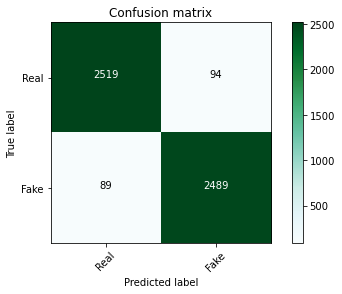

In [71]:
cm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [74]:
clf.fit(xv_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [75]:
pred_adaBoost = clf.predict(xv_test)
print(clf.score(xv_test, y_test))

0.9433635137738393


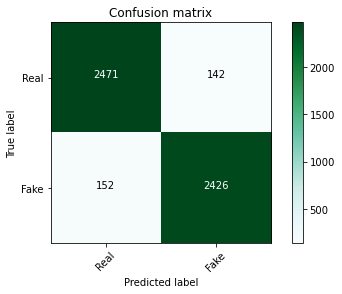

In [76]:
cm = metrics.confusion_matrix(y_test, pred_adaBoost)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [77]:
print(classification_report(y_test,pred_adaBoost))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2613
           1       0.94      0.94      0.94      2578

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



## XGBoost

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(xv_train, y_train)

In [80]:
pred_XGBoost = clf.predict(xv_test)

In [81]:
clf.score(xv_test, y_test)

0.9343093816220381

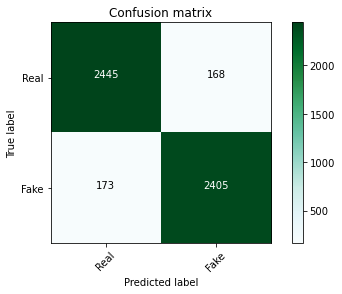

In [82]:
cm = metrics.confusion_matrix(y_test, pred_XGBoost)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [83]:
print(classification_report(y_test,pred_XGBoost))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2613
           1       0.93      0.93      0.93      2578

    accuracy                           0.93      5191
   macro avg       0.93      0.93      0.93      5191
weighted avg       0.93      0.93      0.93      5191

